In [256]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

# Se importan paquetes de análisis de datos- Proceso

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

BaseVentasFusionAgro = pd.read_csv("11.csv")

# Se importan categorías de producto, cultivo y cliente

Zona = pd.read_csv("Zona.csv")

Producto = pd.read_csv("Producto.csv")

Cultivo = pd.read_csv("Cultivo.csv")

Mesatrimestre = pd.read_csv("Mesatrimestre.csv")


# Se incluyen las categorías en la base

Ventas_zona = BaseVentasFusionAgro.merge(Zona, how='left', left_on='RM/ REIQ', right_on='RM/ REIQ_')

Ventas_zona_producto = Ventas_zona.merge(Producto, how='left', left_on='Producto_', right_on='Producto_')

Ventas_zona_producto_ = Ventas_zona_producto.merge(Mesatrimestre, how='left', left_on='Mes', right_on='Mes')

Ventas_zona_producto_cultivo = Ventas_zona_producto_.merge(Cultivo, how='left', left_on='Cultivo_', right_on='Cultivo', indicator = True)

# Columnas disponibles

Producto.columns
Cultivo.columns
Zona.columns

# Listado de zonas y categorías de cultivos disponibles

Ventas_zona_producto_cultivo['Zona Ranking_'].unique()

Ventas_zona_producto_cultivo['Cultivo_Categoría'].unique()

Ventas_zona_producto_cultivo['Periodo'].unique()

Ventas_zona_producto_cultivo['Trimestre'].unique()

#Columnas auxiliares

Ventas_zona_producto_cultivo['Utilidad $M'] = Ventas_zona_producto_cultivo['Utilidad']/1000000

Ventas_zona_producto_cultivo['Utilidad/Utilidad_total (%)'] = Ventas_zona_producto_cultivo['Utilidad']*100/(Ventas_zona_producto_cultivo['Utilidad'].sum())




Toggle code

In [257]:
#Criterios para filtrar datos

Periodoconsiderado_2022 = Ventas_zona_producto_cultivo['Periodo'] == 2022
Periodoconsiderado2021 = Ventas_zona_producto_cultivo['Periodo'] == 2021
Periodoconsiderado2021 = Ventas_zona_producto_cultivo['Periodo'] == 2020
Zonaconsiderada_Noroeste = Ventas_zona_producto_cultivo['Zona Ranking_'] == "01 Noroeste"
ZonaconsideradaZona2 = Ventas_zona_producto_cultivo['Zona Ranking_'] == "03 Zona 2"
ZonaconsideradaPacífico = Ventas_zona_producto_cultivo['Zona Ranking_'] == "02 Pacífico"
EmpresaconsideradaMéxico = Ventas_zona_producto_cultivo['Empresa'] == "México"
T1 = ['T1']
T1yT2 = ['T1', 'T2']
T1aT4 = ['T1', 'T2','T3', 'T4']
Catdecultivo = Ventas_zona_producto_cultivo['Cultivo_Categoría'] == "Hortalizas"
AdmCat_Cito = Ventas_zona_producto_cultivo['Administracion de la categoria'] == "1 Cito"
AdmCat_Suelo = Ventas_zona_producto_cultivo['Administracion de la categoria'] == "2 Raiz/ suelo"
AdmCat_Bioest = Ventas_zona_producto_cultivo['Administracion de la categoria'] == "3 Bioestimulante"
AdmCat_Coady = Ventas_zona_producto_cultivo['Administracion de la categoria'] == "4 Coadyuvante"
H2 = Ventas_zona_producto_cultivo['H1 o H2 o Resto'] == "H2"


In [258]:

# Plan 2022 corresponde al año 2022, también es posible seleccionar 2020 o 2021

Ventas_zona_producto_cultivo_2022 = Ventas_zona_producto_cultivo[Ventas_zona_producto_cultivo['Trimestre'].isin(
    T1) &
    Periodoconsiderado_2022 & 
    EmpresaconsideradaMéxico & 
    H2 ]

Ventas_zona_producto_cultivo_Cito_2022 = Ventas_zona_producto_cultivo[Ventas_zona_producto_cultivo['Trimestre'].isin(
    T1) &
    Periodoconsiderado_2022 & 
    EmpresaconsideradaMéxico &
    AdmCat_Cito& 
    H2 ]
Ventas_zona_producto_cultivo_Suelo_2022 = Ventas_zona_producto_cultivo[Ventas_zona_producto_cultivo['Trimestre'].isin(
    T1) &
    Periodoconsiderado_2022 & 
    EmpresaconsideradaMéxico &
    AdmCat_Suelo& 
    H2 ]
Ventas_zona_producto_cultivo_Bioest_2022 = Ventas_zona_producto_cultivo[Ventas_zona_producto_cultivo['Trimestre'].isin(
    T1) &
    Periodoconsiderado_2022 & 
    EmpresaconsideradaMéxico &
    AdmCat_Bioest& 
    H2 ]
Ventas_zona_producto_cultivo_Coady_2022 = Ventas_zona_producto_cultivo[Ventas_zona_producto_cultivo['Trimestre'].isin(
    T1) &
    Periodoconsiderado_2022 & 
    EmpresaconsideradaMéxico &
    AdmCat_Coady& 
    H2 ]

# Utilidad del primer trimestre H2, Mx:

In [259]:

print ('${:,.3f} M'.format(Ventas_zona_producto_cultivo_2022['Utilidad'].sum()/1000000) )

$5.007 M


In [260]:
Desgloseporhorizonte_ = Ventas_zona_producto_cultivo_2022.groupby(
                                                ['Producto_Ranking']
                                        ).agg(
                                                {'Utilidad $M': 'sum'}).style.bar(subset=['Utilidad $M'], color='red')
display(Desgloseporhorizonte_)

,Utilidad $M
Producto_Ranking,
05 Jun�perus StressOff,4.226721
14 Aciggib ReactMaxx,0.325754
17 Querkus SmartSelect,0.454788


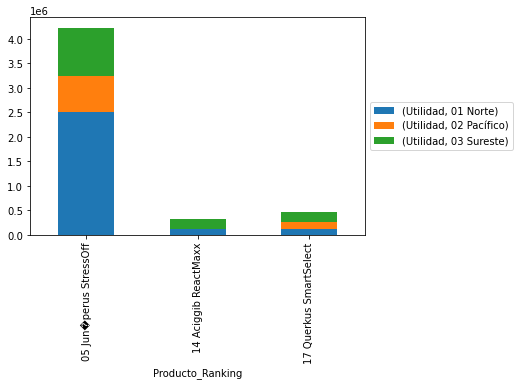

In [261]:

# Plan 2022 desglosado por cliente y categoría

Utilidadporclienteycategoria = Ventas_zona_producto_cultivo_2022.groupby(
                                                ['Producto_Ranking','Zona_Ranking']
                                        ).agg(
                                                {'Utilidad': 'sum'}).reset_index()
Utilidadporclienteycategoria_ = Ventas_zona_producto_cultivo_2022.groupby(
                                                ['Producto_Ranking','Zona_Ranking']
                                        ).agg(
                                                {'Utilidad': 'sum'})
# Gráfica de barras
pd.DataFrame(Utilidadporclienteycategoria_.unstack(level = 1)).plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()




#    # Clientes en los que se enfoca Juníperus en el primer trimestre

In [262]:
print ('${:,.3f} M'.format(
                            Ventas_zona_producto_cultivo_Bioest_2022['Utilidad'].sum()
                            /1000000)
      )
print ('%{:,.1f} '.format(
                            Ventas_zona_producto_cultivo_Bioest_2022['Utilidad'].sum()*100/
                            Ventas_zona_producto_cultivo_2022['Utilidad'].sum()) )



$4.227 M
%84.4 


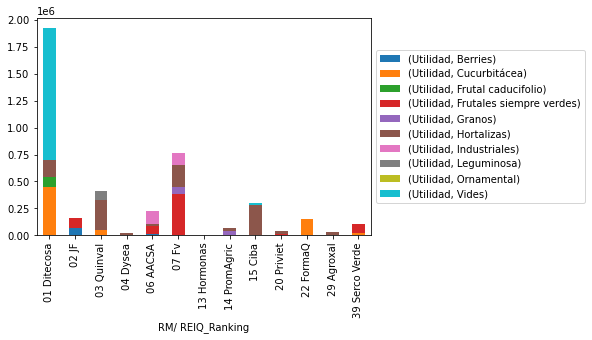

In [263]:
# Bioest 2022 desglosado por cliente y cultivo
UtilidadporclienteycultivoBioest = Ventas_zona_producto_cultivo_Bioest_2022.groupby(
                                                                            ['RM/ REIQ_Ranking','Cultivo_Categoría']
                                                                            ).agg(
                                                                            {'Utilidad': 'sum'}).reset_index()
UtilidadporclienteycultivoBioest_ = Ventas_zona_producto_cultivo_Bioest_2022.groupby(
                                                                            ['RM/ REIQ_Ranking','Cultivo_Categoría']
                                                                            ).agg(
                                                                            {'Utilidad': 'sum'})
# Gráfica de barras
UtilidadporclienteycultivoBioest_df = pd.DataFrame(UtilidadporclienteycultivoBioest_.unstack(level = 1))
UtilidadporclienteycultivoBioest_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [265]:
print('${:,.3f} M'.format(DetalleBioest2022_sorted['Utilidad $M'].head(10).sum()))

$3.350 M


# Cultivos y clientes en los que se enfoca Querkus en el primer trimestre

In [266]:

print ('${:,.3f} M'.format(
                            Ventas_zona_producto_cultivo_Suelo_2022['Utilidad'].sum()
                            /1000000)
      )
print ('%{:,.1f} '.format(
                            Ventas_zona_producto_cultivo_Suelo_2022['Utilidad'].sum()*100/
                            Ventas_zona_producto_cultivo_2022['Utilidad'].sum()) )

$0.455 M
%9.1 


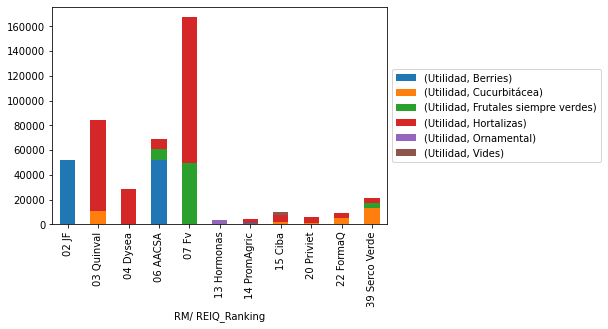

In [267]:
# Suelo 2022 desglosado por cliente y cultivo
UtilidadporclienteycultivoSuelo = Ventas_zona_producto_cultivo_Suelo_2022.groupby(
                                                                            ['RM/ REIQ_Ranking','Cultivo_Categoría']
                                                                            ).agg(
                                                                            {'Utilidad': 'sum'}).reset_index()
UtilidadporclienteycultivoSuelo_ = Ventas_zona_producto_cultivo_Suelo_2022.groupby(
                                                                            ['RM/ REIQ_Ranking','Cultivo_Categoría']
                                                                            ).agg(
                                                                            {'Utilidad': 'sum'})
# Gráfica de barras
UtilidadporclienteycultivoSuelo_df = pd.DataFrame(UtilidadporclienteycultivoSuelo_.unstack(level = 1))
UtilidadporclienteycultivoSuelo_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [269]:
print('${:,.3f} M'.format(DetalleSuelo2022_sorted['Utilidad $M'].head(10).sum()))

$0.414 M
